In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# Air_Visit_Data.csv

In [2]:
df = pd.read_csv("../data/air_visit_data.csv", parse_dates=['visit_date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null datetime64[ns]
visitors        252108 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ MB


In [4]:
df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [5]:
df.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [6]:
df.isnull().values.any()

False

Data is clean and it does not contain any missing values.

In [7]:
df['visit_date'].describe()

count                  252108
unique                    478
top       2017-03-17 00:00:00
freq                      799
first     2016-01-01 00:00:00
last      2017-04-22 00:00:00
Name: visit_date, dtype: object

### Data visualization

In [8]:
df_visits = df[['visit_date', 'visitors']]

# Set index and delete the column
df_visits.index = df_visits['visit_date']
del df_visits['visit_date']

In [9]:
df_visits.head()

,visitors
visit_date,
2016-01-13,25
2016-01-14,32
2016-01-15,29
2016-01-16,22
2016-01-18,6


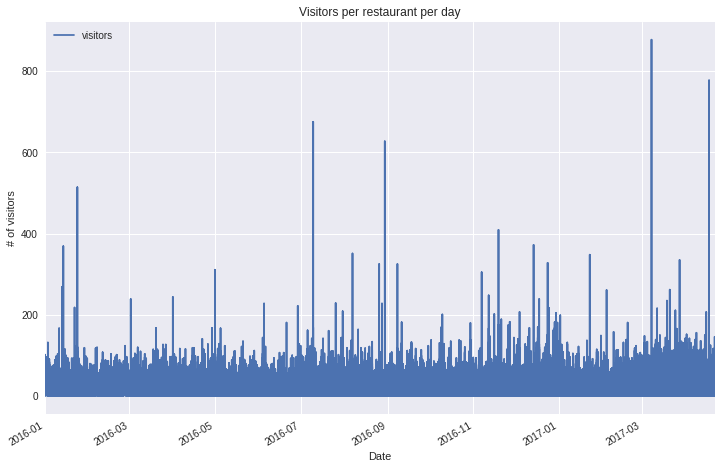

In [10]:
ax = df_visits.plot(figsize=(12,8), 
                          title='Visitors per restaurant per day');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

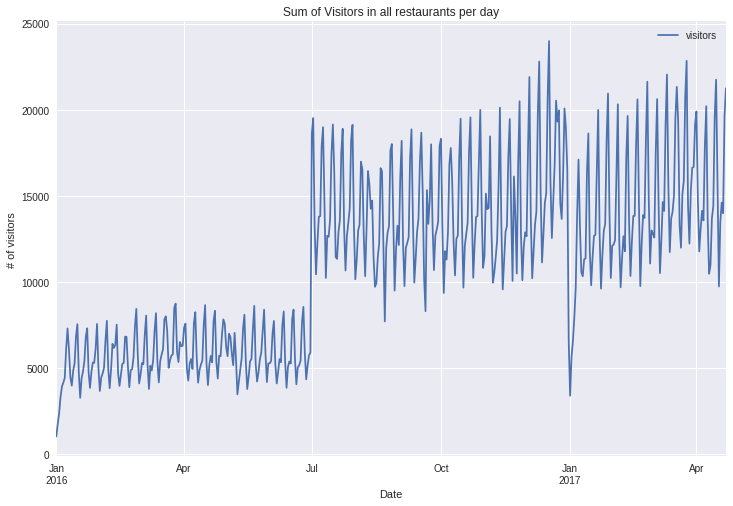

In [11]:
ax = df_visits.resample('D').sum().plot(figsize=(12,8), 
                                   title='Sum of Visitors in all restaurants per day');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

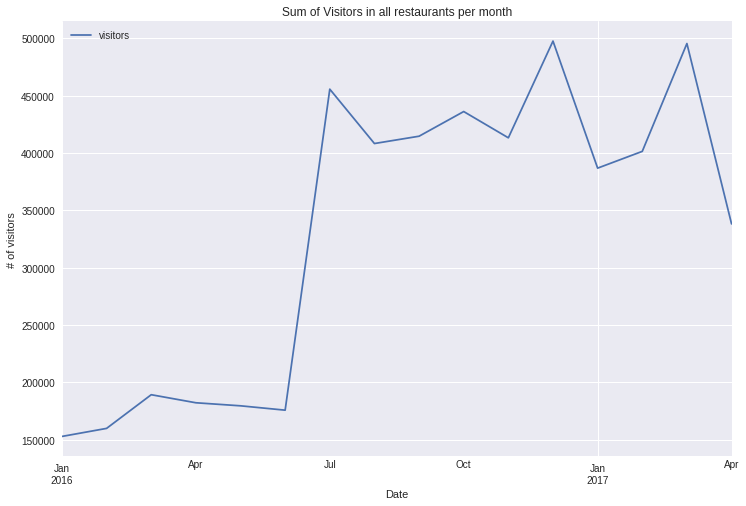

In [12]:
ax = df_visits.resample('M').sum().plot(figsize=(12,8), 
                                   title='Sum of Visitors in all restaurants per month');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

In [13]:
# double check
df_visits['2016-01-01' : '2016-02-01'].sum()

visitors    156593
dtype: int64

# IDEAS and THOUGHTS

* what happened around July 2016 that number of visitors per day trippled (from ~5000/day to ~15000/day), thus monthly number of visitors also trippled (from ~175000/month to ~450000/month)?
* What happened in April 2017, that number of visitors per month dropped to ~340000? In 2016 we could not observe any similar drop?